    #################
    Author: Ryoji Kuwae Neto
    Role: Data Scientist
    Email: ryojikn@gmail.com
    This topic is based and makes references to the following book and the link below
    Source: Digital Image Processing, Richard E. Woods, Steven L. Eddins
    https://www.kaggle.com/haytamert/jpeg-compression
    #################
    
## Compressão de imagens

No último post, falamos sobre o que eram imagens e como nós conseguiamos representar a visão humana com o uso de câmeras e seus sensores, também sobre como as imagens são representadas em um computador, e com isso tocamos em um dos problemas quando tratamos de imagem que é o seu tamanho.
Vimos que uma imagem de dimensão 1000x1000 pode atingir cerca de 2MB, e ela sozinha tudo bem, pode não ser tanto problema, mas quando consideramos um video que é uma sequência de imagens concatenadas, isso se torna um problema bem grande e para isso nós precisamos utilizar alguma técnica de compressão. Outras razões para que nós utilizemos a compressão é que geralmente, as imagens possuem muita redundância, e aplicando uma maneira otimizada de compressão, nós conseguimos economizar uma porção de bytes de memória.

<img src="imgs/reason_to_compress.JPG">

Há muito tempo, cada fabricante de câmeras era responsável por criar um técnica de armazenamento de imagem e isso gerava diversos problemas quando você alocava essa imagem para outra tarefa. Alguns padrões acabaram se popularizando, e hoje já não temos mais problemas entre as técnicas de compressão e o uso destas. 

<img src="imgs/image_formats.JPG">

Neste post, iremos falar um pouco sobre o formato JPEG que é bem difundido, e também como sua compressão funciona.

## Método de compressão

A maior parte das técnicas de compressão utiliza a arquitetura abaixo, pois ela é funcional, e entre uma e outra, apenas algumas adições são atribuidas.
O método consiste no recebimento de uma imagem, que possui m linhas e n colunas, cada célula contendo de 1 a 3 valores (pro caso de grayscale ou para RGB), e esta imagem é passada então por um "**Mapper**", responsável por tornar essa imagem mais amigável para o processo de compressão.

- Esta primeira etapa pode ser realizada no domínio espacial, ou ela pode ser transferida para outro domínio, e ter a utilização de uma transformada, por exemplo.
- Depois do mapper, uma etapa de **Quantização** é aplicada, e lembrando que a quantização é uma das maiores responsáveis pela adição de ruído na imagem, pois dependendo da técnica de quantização, um pouco de informação pode ser perdida.
- E por fim um **Symbol encoder**, responsável por estruturar a imagem e preparar para armazenamento em máquina, utilizando uma quantidade de bytes significativamente melhor.
- Após estas etapas, o exato mesmo processo é feito na descompressão, para que você consiga visualizar essa imagem.

É importante ressaltar que dependendo da forma como a compressão foi feita, pode-se perder informação e você não terá mais a imagem em seu formato original.

<img src="imgs/compression.JPG">


## E como é feita a compressão em JPEG?

A compressão em JPEG passa por cada um dos steps que citamos, veja como:

- JPEG pega uma imagem e subdivide em 8x8 subimages
- Realiza uma Forward Transform, no caso uma DCT (Discrete Cosine Transform)
- Realiza uma Quantização
- E por fim, utiliza um tipo de encoder para finalizar a compressão, que no caso é o Huffman Coding.

Caso você tenha uma imagem comprimida em JPEG, o processo inverso é realizado.

<img src="imgs/jpeg_compression.JPG">

### Subdivisão

O padrão jpeg codifica blocos 8x8 sem sobreposição, e existem técnicas, caso estes blocos não consigam preencher o tamanho exato da imagem, mas em geral é assim que estes blocos são subdivididos.

Estas subdivisões são feitas em cada um dos canais de cores, no vermelho, verde e por fim no azul. Porém, existe uma forte correlação entre os canais de cores, e o que o JPEG faz? Ele converte o padrão RGB antes de realizar a subdivisão em um padrão diferente: o Y Cb Cr.

- Y: Componente de luma
- Cb: Componente cromado de diferença azul
- Cr: Componente cromado de diferença vermelha

Quando vemos uma tv em preto e branco, basicamente o que conseguimos ver é o Y, ou seja, sabemos que existe alguma coloração ali, e conseguimos ver uma diferença entre os tons que vão desde branco, até preto. As componentes Cb e Cr compõe as cores.
Esta é uma matriz reversível, então quando você faz a transformada inversa, é possível obter novamente a matriz RGB.

### Discrete Cosine Transform

Após a subdivisão de imagens em blocos de 8x8 realizado no padrão JPEG, uma transformada é aplicada a cada uma destas subimagens para que a informação mais relevante seja extraída. A DCT é uma matriz de rotação, que move a maior parte da informação contida para os primeiros elementos do vetor, e isso facilita o processo de compressão do dado.

E por que não usar uma Transformada de Fourier? A transformada de Fourier assume uma periodicidade ciclíca, que se repete de tempos em tempos, tanto que ela é fortemente usada para sinais de rádio, pois os sinais são ondas que tendem a se repetir. No caso de uma imagem, não existe necessariamente uma forma de identificar quando um pixel deve voltar a se repetir, e por isso usamos a DCT.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Dandelion_clock_quarter_dft_dct.png/300px-Dandelion_clock_quarter_dft_dct.png">

Para uma explicação mais densa sobre esta transformada, [veja aqui.](https://www.coursera.org/learn/image-processing/lecture/N6T4l/4-the-discrete-cosine-transform-dct-duration-25-32-optional-break-at-12-13)

### Quantização

Depois de aplicarmos a DCT, temos diversas matrizes de 8x8 da mesma forma que possuiamos antes, porém agora já não temos mais os valores em si que representam a cor em determinado ponto da imagem. O que temos neste ponto são coeficientes, e aplicamos uma multiplicação com a matriz de quantização para selecionar os coeficientes que desejamos manter e descartar os demais.

Existem diversas técnicas de quantização e matrizes diferentes para a quantização, porém a matriz de quantização para o JPEG já é popular e podemos buscar facilmente no Google que poderemos encontra-la.

<img src="https://image.slidesharecdn.com/jpegaish-160111065623/95/jpeg-image-compression-19-638.jpg?cb=1452495492">

### Huffman Coding

## Vamos a pratica



In [1]:
import rawpy
import imageio
import numpy as np 
import pandas as pd 
import sys
import cv2
from matplotlib import pyplot as plt

path = 'imgs/raw_uncompressed.NEF'
raw = rawpy.imread(path)
rgb = raw.postprocess()
img = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

In [2]:
def showImage(img):
    plt.figure(figsize=(15,15))
    plt.imshow(img,cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.show()

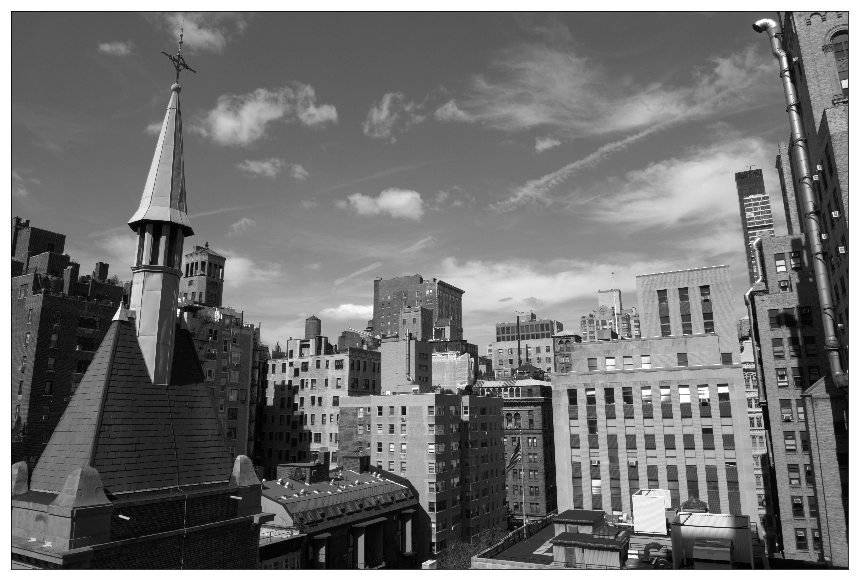

In [3]:
showImage(img)

In [4]:
sys.getsizeof(img)

36329384

In [5]:
height  = len(img) #one column of image
width = len(img[0]) # one row of image
sliced = [] # new list for 8x8 sliced image 
block = 8
print("The image heigh is " +str(height)+", and image width is "+str(width)+" pixels")

The image heigh is 4924, and image width is 7378 pixels


In [6]:
currY = 0 #current Y index
for i in range(block,height+1,block):
    currX = 0 #current X index
    for j in range(block,width+1,block):
        sliced.append(img[currY:i,currX:j]-np.ones((8,8))*128) #Extracting 128 from all pixels
        currX = j
    currY = i
    
print("Size of the sliced image: "+str(len(sliced)))
print("Each elemend of sliced list contains a "+ str(sliced[0].shape)+ " element.")

Size of the sliced image: 567030
Each elemend of sliced list contains a (8, 8) element.


In [7]:
imf = [np.float32(img) for img in sliced]

#### Aplicando o DCT

In [8]:
DCToutput = []
for part in sliced:
    currDCT = cv2.dct(part)
    DCToutput.append(currDCT)
DCToutput[0][0]

array([-3.53625000e+02,  2.32663416e+00, -2.41697651e+00, -9.07814709e-01,
       -1.25000000e-01, -5.18517476e-01,  1.67763958e+00,  8.97934054e-01])

#### Definindo as matrizes de quantização

In [9]:
#Quantization Arrays

def selectQMatrix(qName):
    Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

    Q50 = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])

    Q90 = np.array([[3,2,2,3,5,8,10,12],
                    [2,2,3,4,5,12,12,11],
                    [3,3,3,5,8,11,14,11],
                    [3,3,4,6,10,17,16,12],
                    [4,4,7,11,14,22,21,15],
                    [5,7,11,13,16,12,23,18],
                    [10,13,16,17,21,24,24,21],
                    [14,18,19,20,22,20,20,20]])
    if qName == "Q10":
        return Q10
    elif qName == "Q50":
        return Q50
    elif qName == "Q90":
        return Q90
    else:
        return np.ones((8,8)) #it suppose to return original image back

#### Aplicando a quantização

In [10]:
selectedQMatrix = selectQMatrix("Q10")
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
DCToutput[0][0]

array([-4.,  0., -0., -0., -0., -0.,  0.,  0.])

#### Reconstruindo a imagem com os processos inversos

In [11]:
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]

array([-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5])

In [12]:
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res = np.vstack((rowNcol))

In [13]:
sys.getsizeof(res)

290319472

In [14]:
res.shape

(4920, 7376)

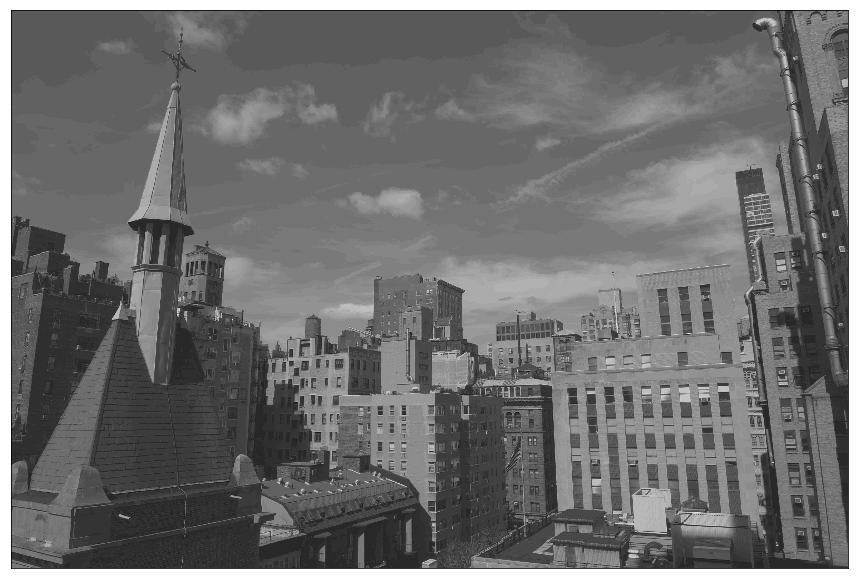

In [15]:
showImage(res)

In [16]:
cv2.imwrite("imgs/test1.jpg", img)

True

In [17]:
cv2.imwrite("imgs/test2.jpg", res)

True

<img src="imgs/compression_results.jpg">